In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv("C:\\Users\\amiro\\Desktop\\Internship cognifiz\\Dataset .csv")

In [5]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [7]:
#Step 1: Preprocess Cuisine Data
df['Cuisines'] = df['Cuisines'].fillna('Unknown')
cuisines_series = df['Cuisines'].str.split(', ').explode()
cuisine_counts = df['Cuisines'].str.split(', ').str.len().fillna(1).astype(int)
cuisine_df = df.loc[df.index.repeat(cuisine_counts)].assign(Cuisine=cuisines_series.values)
print("\nSample of Exploded Cuisine Data:")
print(cuisine_df[['Restaurant Name', 'Cuisines', 'Cuisine', 'Aggregate rating', 'Votes']].head())


Sample of Exploded Cuisine Data:
          Restaurant Name                          Cuisines   Cuisine  \
0        Le Petit Souffle        French, Japanese, Desserts    French   
0        Le Petit Souffle        French, Japanese, Desserts  Japanese   
0        Le Petit Souffle        French, Japanese, Desserts  Desserts   
1        Izakaya Kikufuji                          Japanese  Japanese   
2  Heat - Edsa Shangri-La  Seafood, Asian, Filipino, Indian   Seafood   

   Aggregate rating  Votes  
0               4.8    314  
0               4.8    314  
0               4.8    314  
1               4.5    591  
2               4.4    270  



Average Rating by Cuisine (Top 20):
Cuisine
Sunda                4.900000
B�_rek               4.700000
Taiwanese            4.650000
Ramen                4.500000
Dim Sum              4.466667
Hawaiian             4.412500
D�_ner               4.400000
Bubble Tea           4.400000
Curry                4.400000
Kebab                4.380000
Izgara               4.350000
Filipino             4.340000
Scottish             4.333333
South African        4.333333
Turkish Pizza        4.325000
World Cuisine        4.300000
Gourmet Fast Food    4.300000
Durban               4.300000
Kiwi                 4.300000
Teriyaki             4.300000
Name: Aggregate rating, dtype: float64


C:\Users\amiro\AppData\Local\Temp\ipykernel_5304\3520180697.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_cuisines_by_rating.index, y=top_20_cuisines_by_rating.values, palette='viridis')


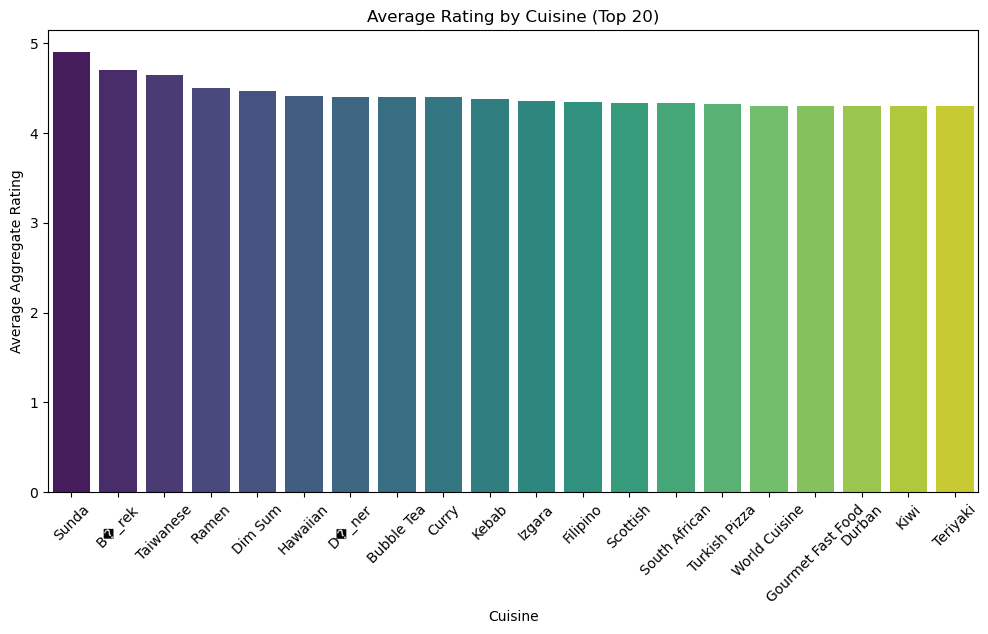

C:\Users\amiro\AppData\Local\Temp\ipykernel_5304\3520180697.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cuisine', y='Aggregate rating', data=cuisine_df[cuisine_df['Cuisine'].isin(top_10_cuisines)], palette='coolwarm')


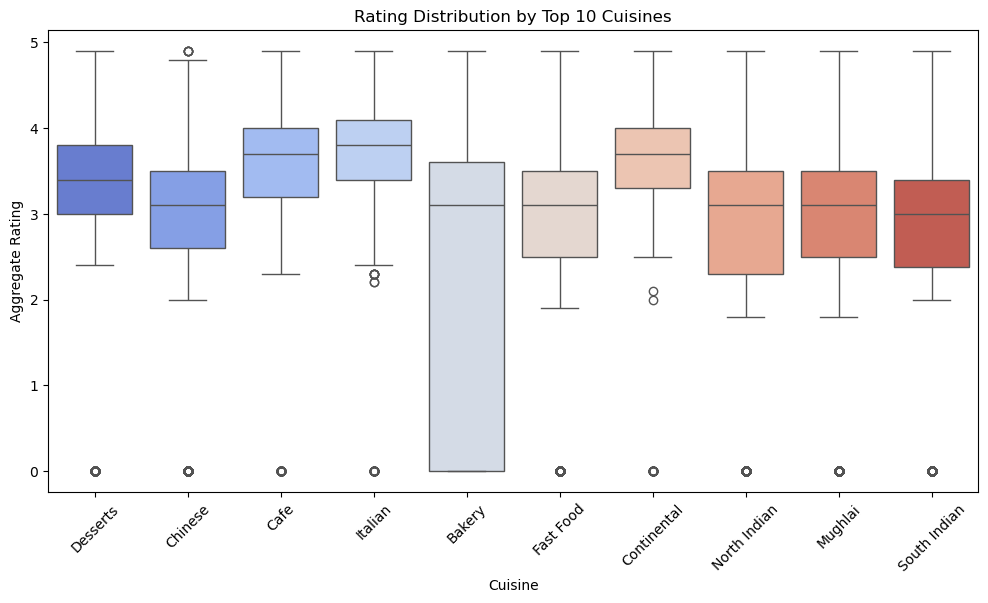

In [9]:
# Step 2: Relationship Between Cuisine and Rating
avg_rating_by_cuisine = cuisine_df.groupby('Cuisine')['Aggregate rating'].mean().sort_values(ascending=False)
top_20_cuisines_by_rating = avg_rating_by_cuisine.head(20)
print("\nAverage Rating by Cuisine (Top 20):")
print(top_20_cuisines_by_rating)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_cuisines_by_rating.index, y=top_20_cuisines_by_rating.values, palette='viridis')
plt.title('Average Rating by Cuisine (Top 20)')
plt.xlabel('Cuisine')
plt.ylabel('Average Aggregate Rating')
plt.xticks(rotation=45)
plt.show()

top_10_cuisines = cuisine_df['Cuisine'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cuisine', y='Aggregate rating', data=cuisine_df[cuisine_df['Cuisine'].isin(top_10_cuisines)], palette='coolwarm')
plt.title('Rating Distribution by Top 10 Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Aggregate Rating')
plt.xticks(rotation=45)
plt.show()


Total Votes by Cuisine (Top 20):
Cuisine
North Indian     595981
Chinese          364351
Italian          329265
Continental      288255
Fast Food        184058
American         183117
Cafe             177568
Mughlai          151946
Desserts         105889
Asian            104303
European         103309
South Indian      80962
Mediterranean     80538
Pizza             78179
Burger            76747
Mexican           74748
Seafood           74254
Thai              65930
Bakery            57696
Street Food       43798
Name: Votes, dtype: int64


C:\Users\amiro\AppData\Local\Temp\ipykernel_5304\2448339417.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_cuisines_by_votes.index, y=top_20_cuisines_by_votes.values, palette='magma')


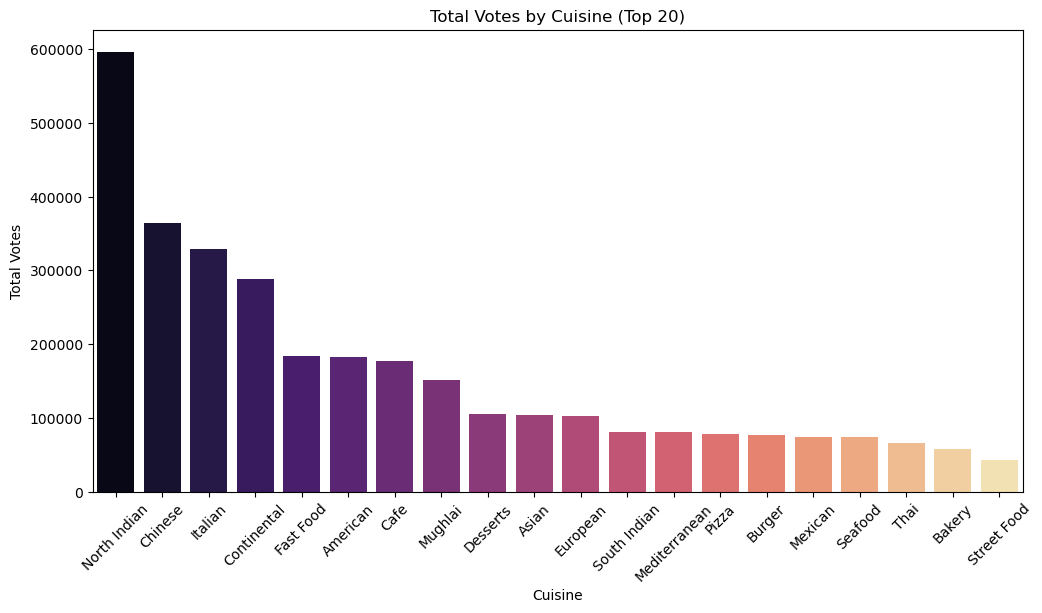

In [11]:
# Step 3: Most Popular Cuisines by Votes
votes_by_cuisine = cuisine_df.groupby('Cuisine')['Votes'].sum().sort_values(ascending=False)
top_20_cuisines_by_votes = votes_by_cuisine.head(20)
print("\nTotal Votes by Cuisine (Top 20):")
print(top_20_cuisines_by_votes)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_cuisines_by_votes.index, y=top_20_cuisines_by_votes.values, palette='magma')
plt.title('Total Votes by Cuisine (Top 20)')
plt.xlabel('Cuisine')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.show()


Top 10 Cuisines with Highest Average Ratings (Min 10 Restaurants):
                   mean  count
Cuisine                       
Kebab          4.380000     10
Filipino       4.340000     10
Indonesian     4.285714     14
Modern Indian  4.281250     16
International  4.247619     21
Cajun          4.200000     10
Western        4.140000     10
Tapas          4.131579     19
Southern       4.129167     24
British        4.112500     16


C:\Users\amiro\AppData\Local\Temp\ipykernel_5304\4263949079.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_high_rated_cuisines.index, y=top_high_rated_cuisines['mean'], palette='YlGnBu')


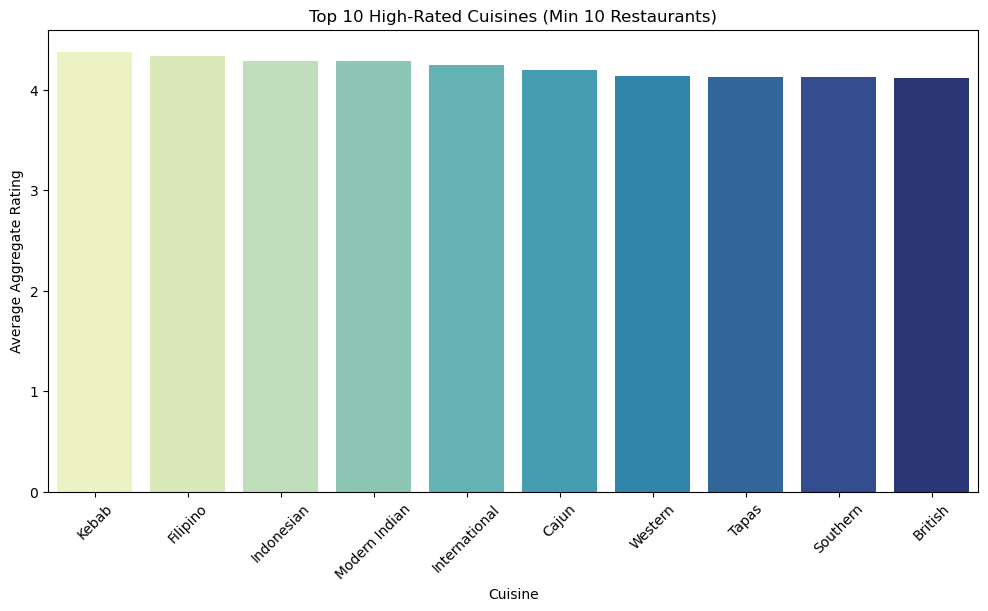

In [13]:
# Step 4: Cuisines with Higher Ratings
cuisine_counts = cuisine_df['Cuisine'].value_counts()
reliable_cuisines = cuisine_counts[cuisine_counts >= 10].index
reliable_cuisine_df = cuisine_df[cuisine_df['Cuisine'].isin(reliable_cuisines)]
reliable_ratings = reliable_cuisine_df.groupby('Cuisine')['Aggregate rating'].agg(['mean', 'count']).sort_values('mean', ascending=False)
top_high_rated_cuisines = reliable_ratings.head(10)
print("\nTop 10 Cuisines with Highest Average Ratings (Min 10 Restaurants):")
print(top_high_rated_cuisines)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_high_rated_cuisines.index, y=top_high_rated_cuisines['mean'], palette='YlGnBu')
plt.title('Top 10 High-Rated Cuisines (Min 10 Restaurants)')
plt.xlabel('Cuisine')
plt.ylabel('Average Aggregate Rating')
plt.xticks(rotation=45)
plt.show()